# Notebook Setup

In [1]:
!which python

/c/Users/Ankita/.conda/envs/ankita/python


In [2]:
!pip install matplotlib

In [3]:
!pip install seaborn

In [4]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import (train_test_split, cross_val_score, 
                                      GridSearchCV, StratifiedKFold)
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve, auc)
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (18, 14)
plt.rcParams['font.size'] = 10


In [5]:
sns.set()

# Load Data
loading Iris flower dataset using scikit-learn's built in dataset

In [6]:
    df_raw = pd.read_csv('Iris.csv')
    print("Loaded from Kaggle CSV file")

 # Extract features and target
    X = df_raw[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
    y = df_raw['Species'].values

Loaded from Kaggle CSV file


In [7]:
df_raw.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
df_raw[:5]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df = df_raw
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
print("Dataset Preview:")
df.head()

Dataset Preview:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## We are using attributes of the Iris flower such as sepal length and width and petal length and width to predict the real class of iris . 

This is a multiclass classification problem.

In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
print(f"  Shape: {df.shape}")

  Shape: (150, 6)


In [13]:
print("\nDataset Information:")
print(f"  Data types:\n{df.dtypes}")


Dataset Information:
  Data types:
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [14]:
print(f"  Duplicate rows: {df.duplicated().sum()}\n")

  Duplicate rows: 0



In [15]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis
Distribution of features and target

In [16]:
# df["SepalLengthCm"].hist()

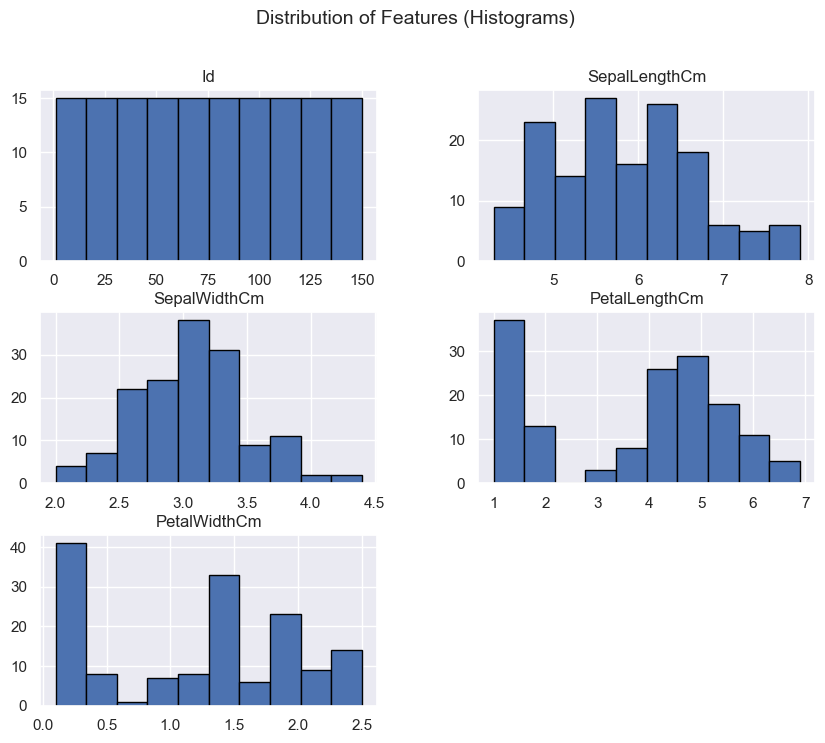

In [17]:
df.hist(figsize=(10,8), edgecolor='black')
plt.suptitle("Distribution of Features (Histograms)", fontsize=14)
plt.show()

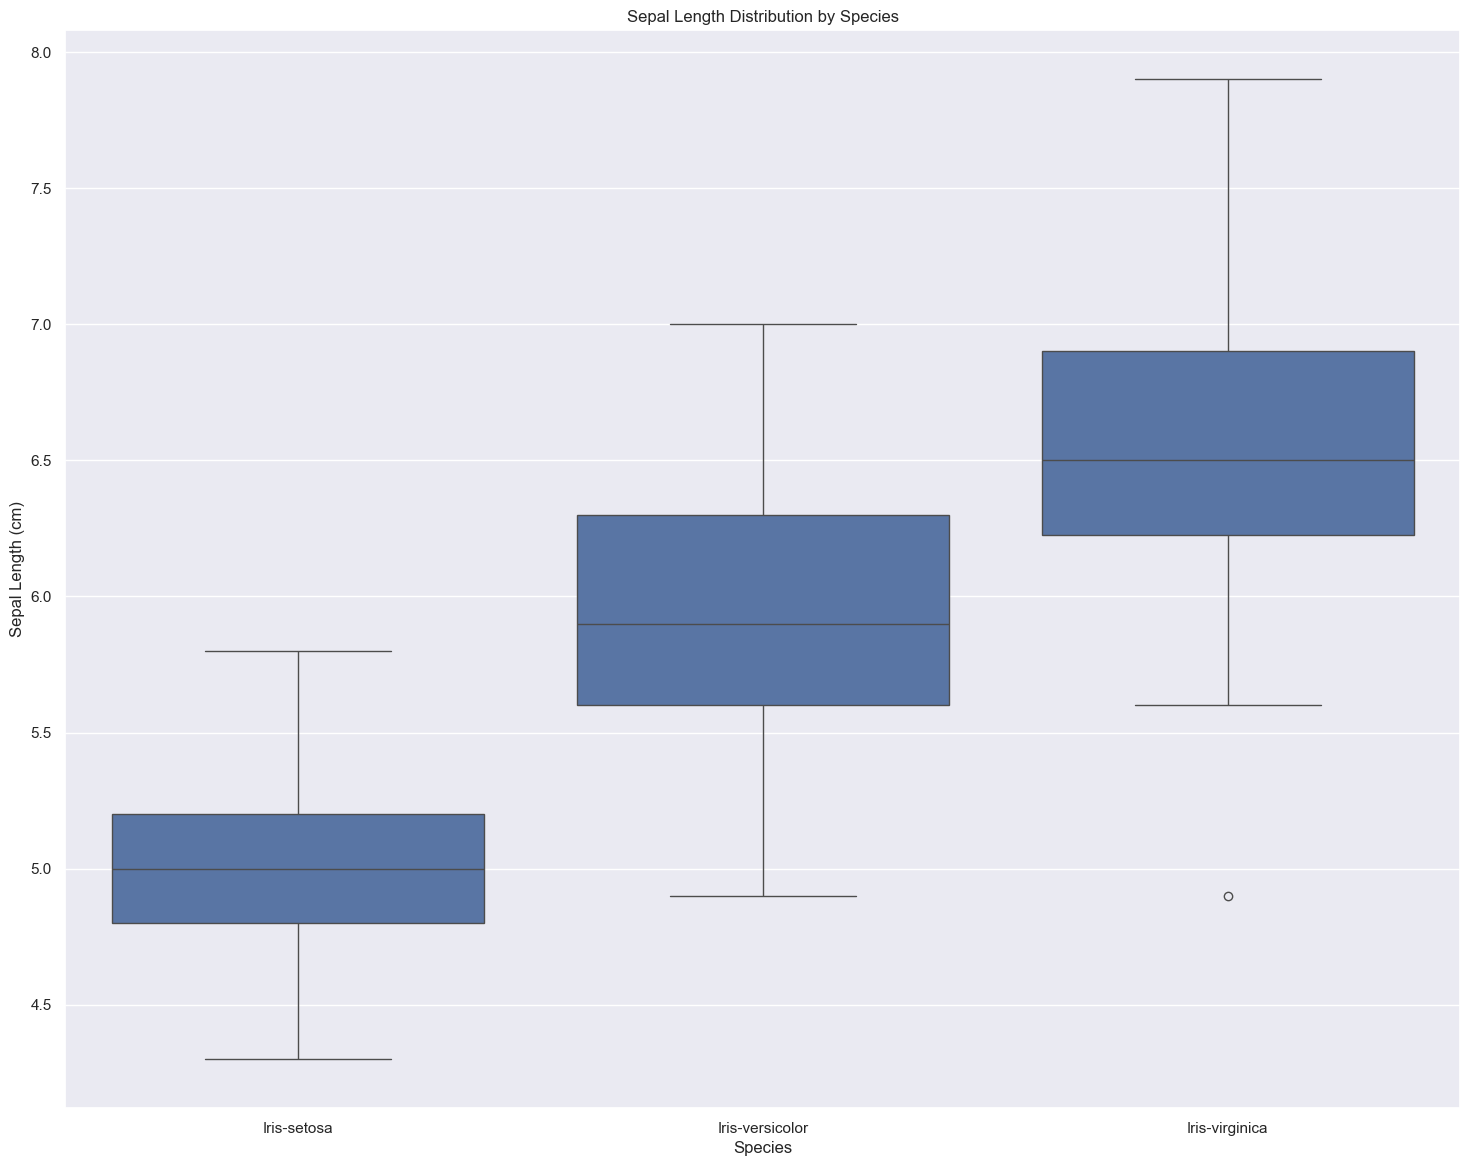

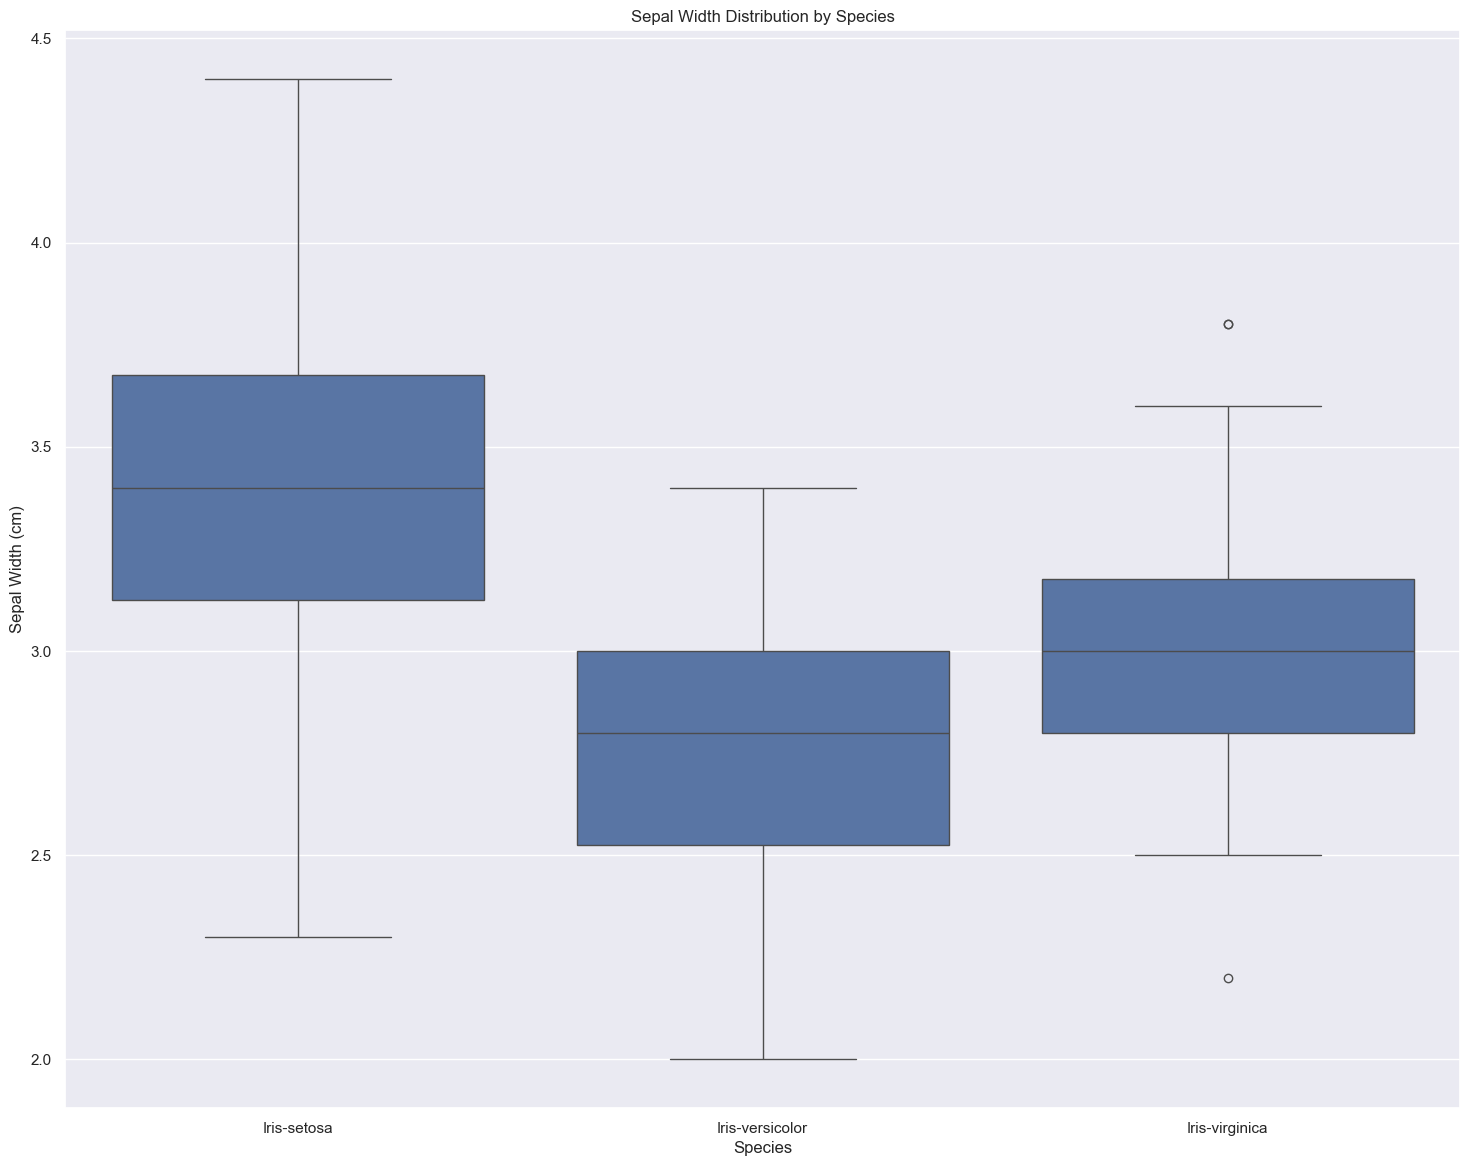

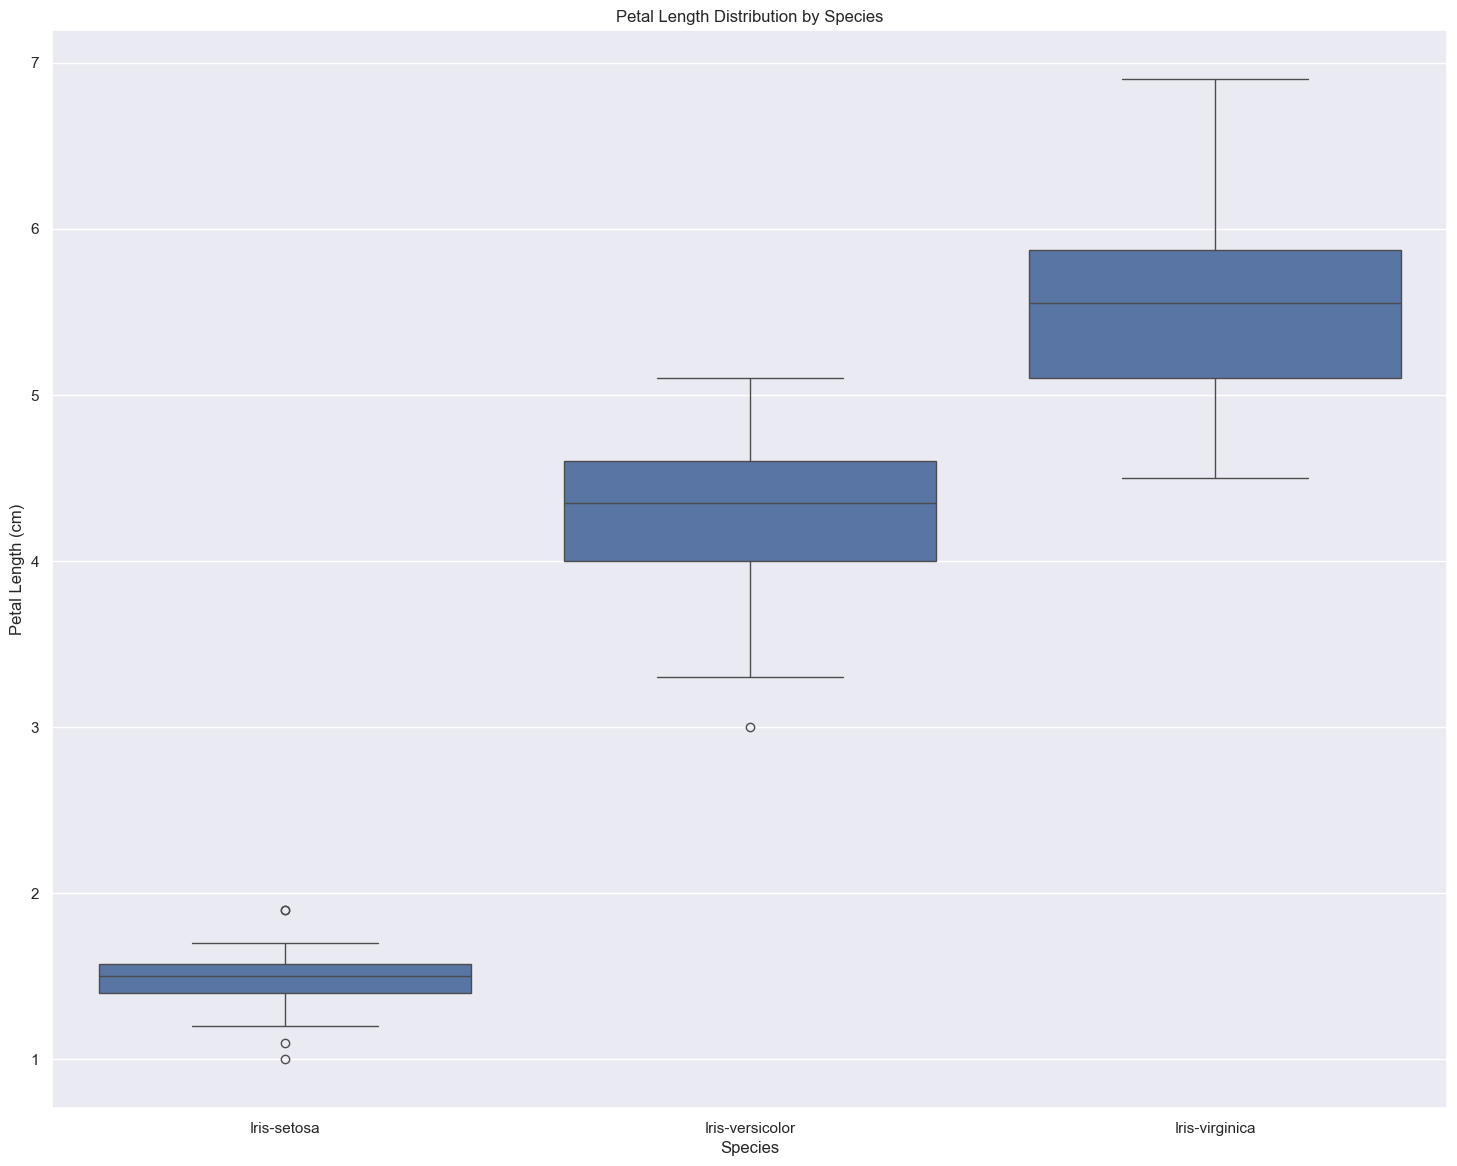

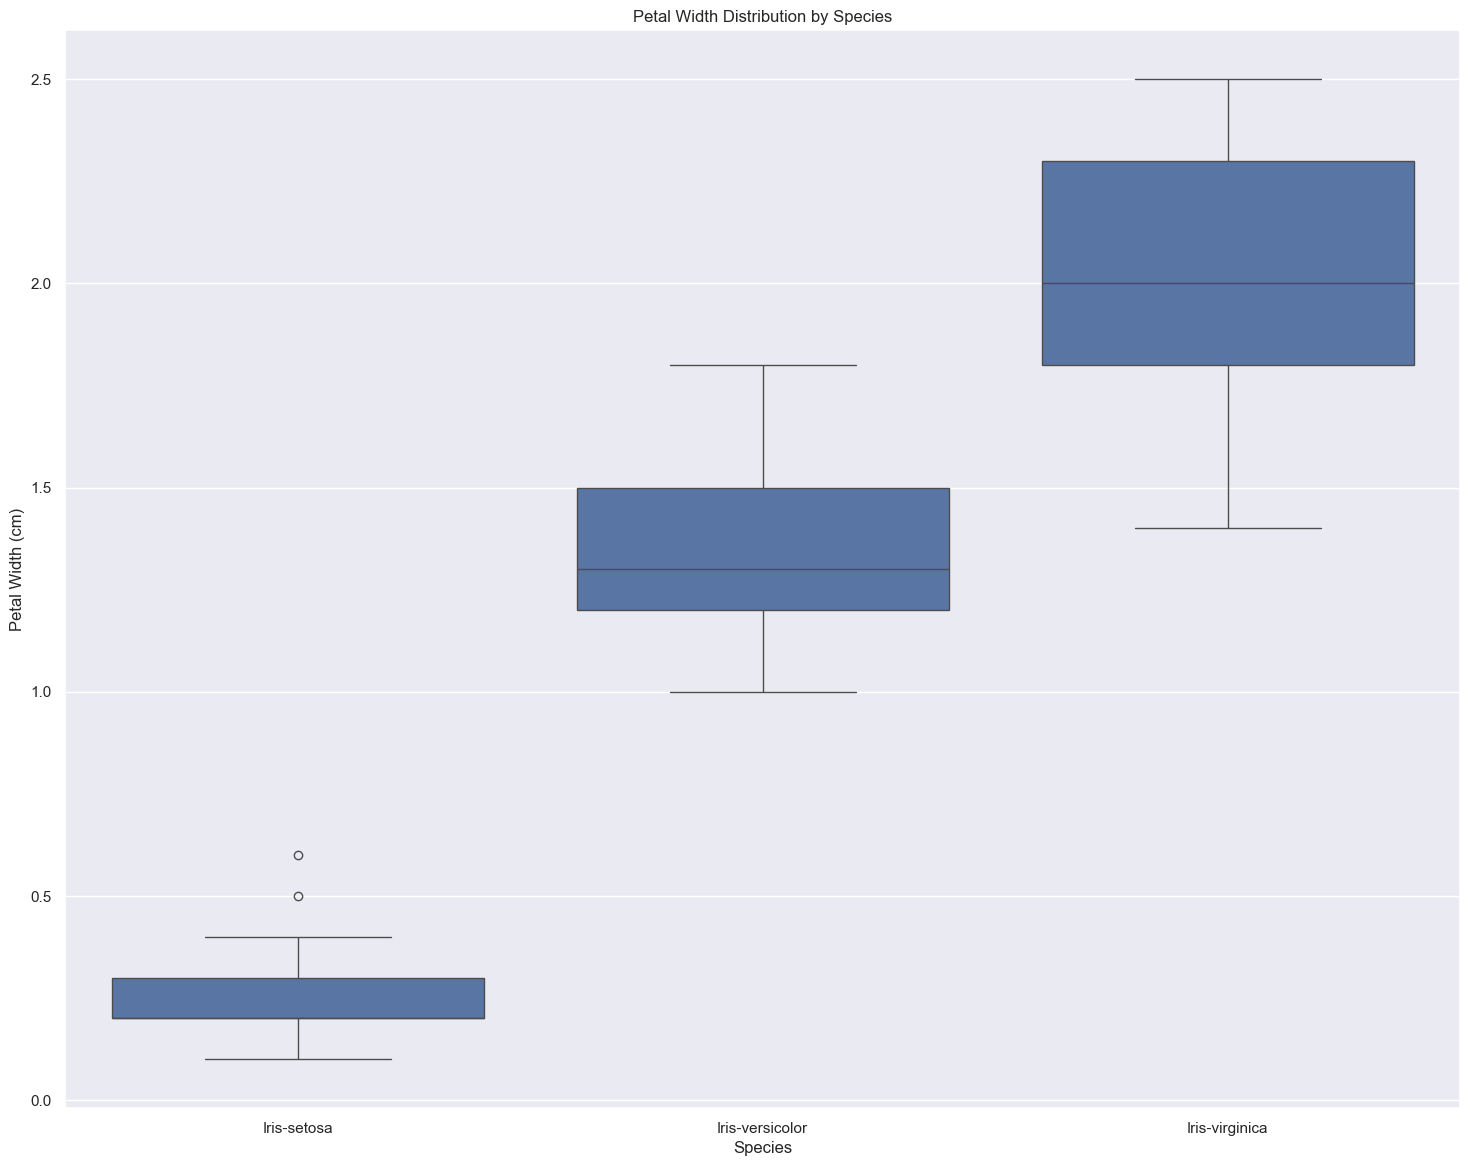

In [18]:
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title("Sepal Length Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length (cm)", )
plt.show()

sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.title("Sepal Width Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Width (cm)")
plt.show()

sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title("Petal Length Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.show()

sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.title("Petal Width Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Petal Width (cm)")
plt.show()

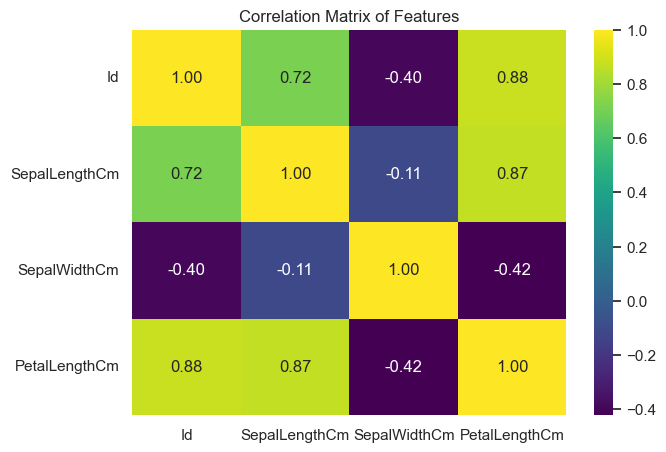

In [19]:
plt.figure(figsize=(7,5))
corr = df.iloc[:,:4].corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

# Relationship of data features with target

In [20]:
df["Species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [21]:
#creating a new column with the species name
#df["target_name"] =df["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

In [22]:
#df

In [23]:
#column = "sepal length (cm)"
#sns.relplot(x = column, y = "target", hue="target_name", data=df)
#_ = plt.suptitle(column, y=1.05)
#plt.show()

In [24]:
#column = "sepal width (cm)"
#sns.relplot(x = column, y = "target", hue="target_name", data=df)
#_ = plt.suptitle(column, y=1.05)
#plt.show() 

In [25]:
#column = "petal length (cm)"
#sns.relplot(x = column, y = "target", hue="target_name", data=df)
#_ = plt.suptitle(column, y=1.05)
#plt.show()

In [26]:
#column = "petal width (cm)"
#sns.relplot(x = column, y = "target", hue="target_name", data=df)
#_ = plt.suptitle(column, y=1.05)
#plt.show()

# Pairplots

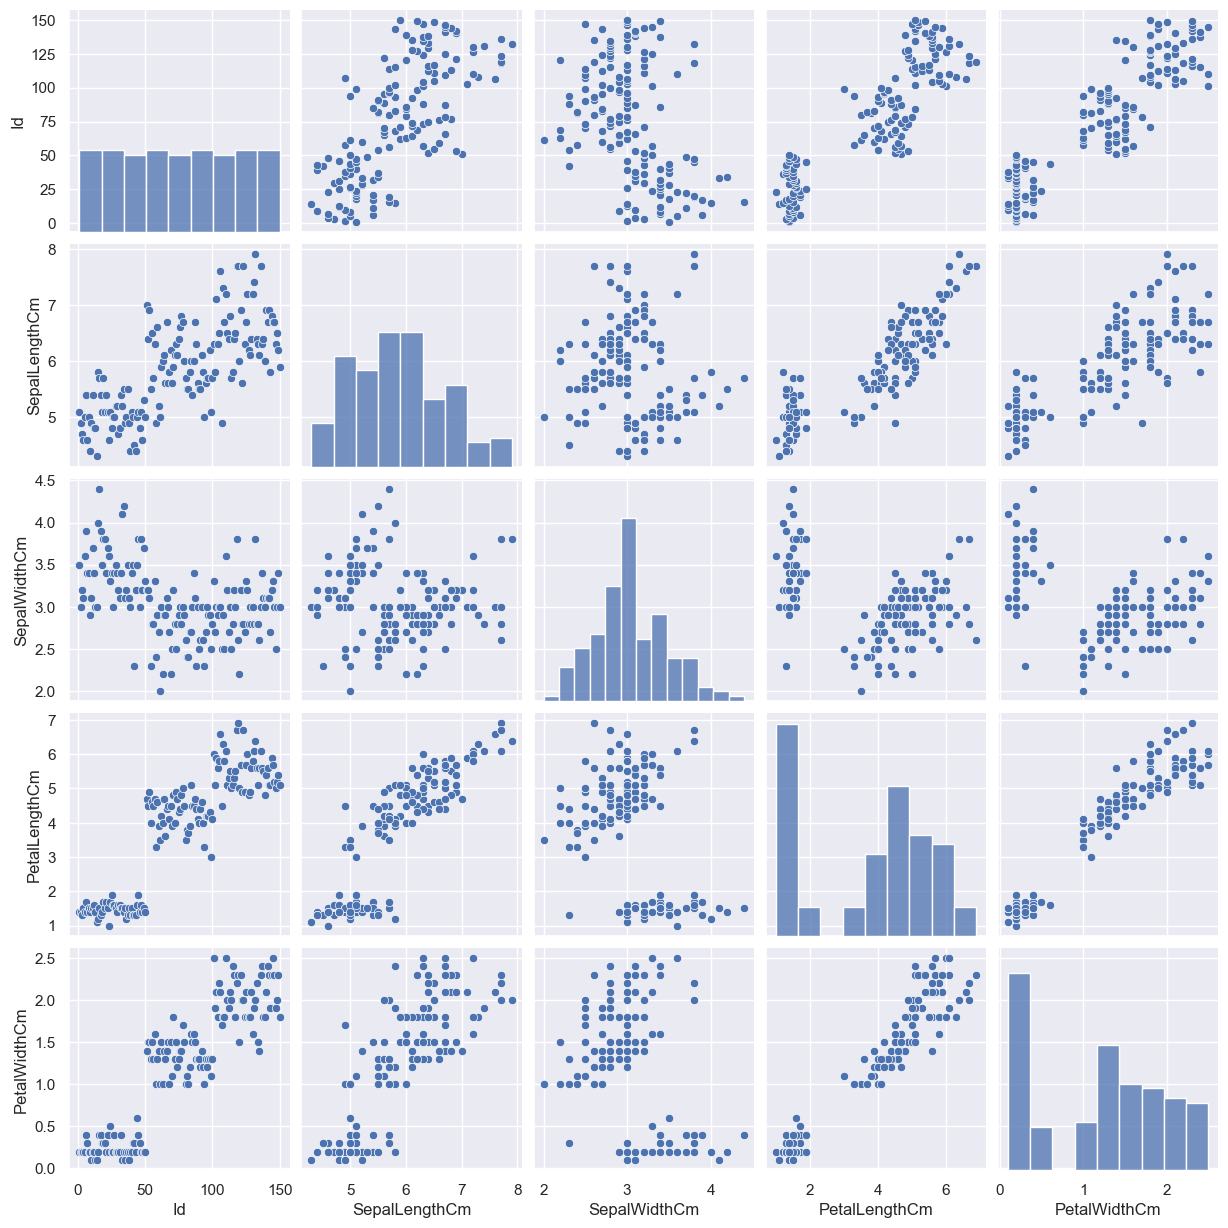

In [27]:
sns.pairplot(df)

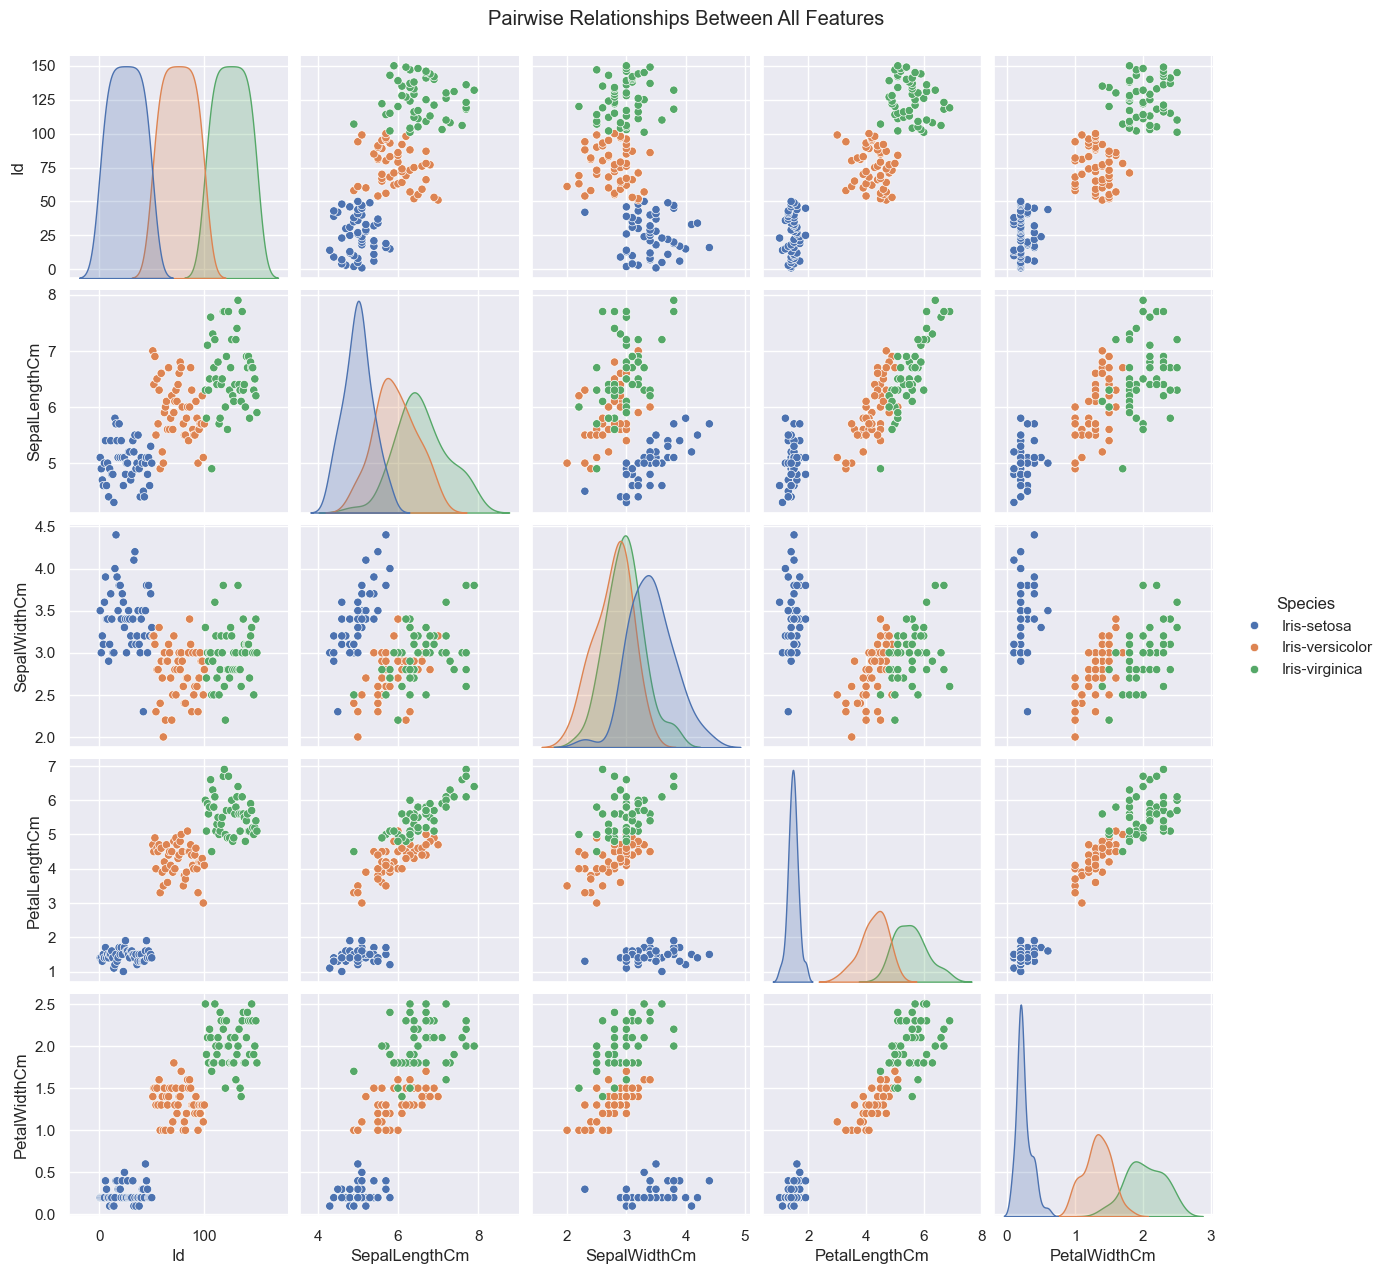

In [28]:
sns.pairplot(df, hue="Species")
plt.suptitle("Pairwise Relationships Between All Features", y=1.02)
plt.show()

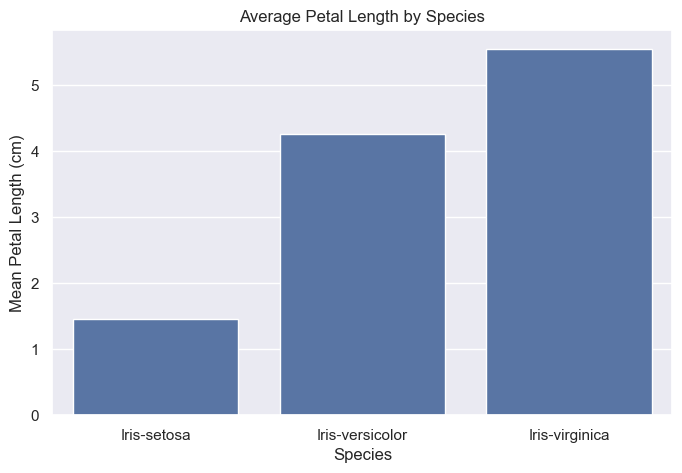

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x='Species', y='PetalLengthCm', data=df, estimator='mean', errorbar=None)
plt.title("Average Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Mean Petal Length (cm)")
plt.show()

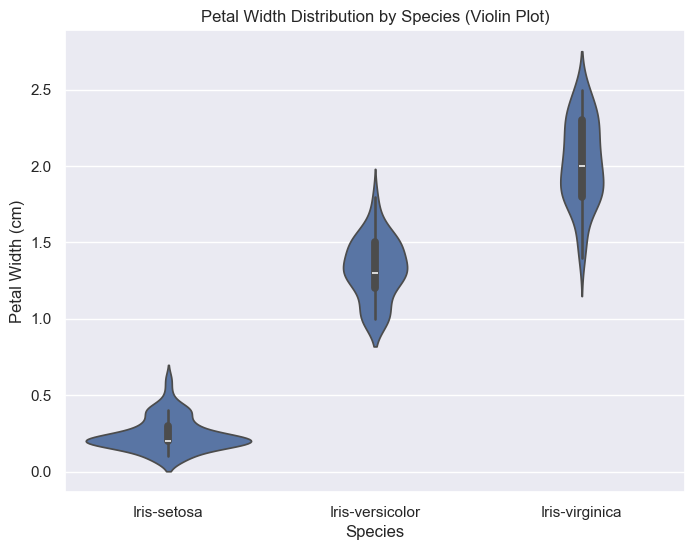

In [30]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Species', y='PetalWidthCm', data=df)
plt.title("Petal Width Distribution by Species (Violin Plot)")
plt.xlabel("Species")
plt.ylabel("Petal Width (cm)")
plt.show()


# Train-Test split and Model Traning

In [31]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [32]:
df[:5]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
    # Extract features and target
    X = df_raw[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
    y_species = df_raw['Species'].values
    
    # Map species names to numbers
    species_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    y = np.array([species_map[s] for s in y_species])
    
    # Create iris object for compatibility
    class IrisData:
        data = X
        target = y
        target_names = np.array(['setosa', 'versicolor', 'virginica'])
        feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
    
    iris = IrisData()
    
    # Create comprehensive DataFrame
    df = pd.DataFrame(X, columns=iris.feature_names)
    df['species'] = iris.target_names[y]
    df['species_code'] = y
    
    print(f"✓ Dataset loaded successfully!")
    print(f"  • Total samples: {len(df)}")
    print(f"  • Total features: {X.shape[1]}")
    print(f"  • Target classes: {len(iris.target_names)}")
    print(f"  • Classes: {', '.join(iris.target_names)}\n")

✓ Dataset loaded successfully!
  • Total samples: 150
  • Total features: 4
  • Target classes: 3
  • Classes: setosa, versicolor, virginica



In [34]:
#X = df.drop('Species', axis=1)
#X.columns

In [35]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [36]:
y[:5]

array([0, 0, 0, 0, 0])

In [37]:
from sklearn.model_selection import train_test_split

# Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
# Feature scaling
scaler_standard = StandardScaler()
scaler_robust = RobustScaler()

X_scaled_standard = scaler_standard.fit_transform(X)
X_scaled_robust = scaler_robust.fit_transform(X)

print(f"✓ Features scaled using StandardScaler")
print(f"  • Feature means: {X_scaled_standard.mean(axis=0).round(3)}")
print(f"  • Feature stds: {X_scaled_standard.std(axis=0).round(3)}\n")

# Stratified train-test split (maintains class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_standard, y, shuffle=True, test_size=0.3, random_state=42, stratify=y
)

print(f"Train-Test Split (Stratified):")
print(f"  • Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  • Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)\n")

print(f"Training set class distribution:")
for i, species in enumerate(iris.target_names):
    count = (y_train == i).sum()
    print(f"  • {species}: {count} ({count/len(y_train)*100:.1f}%)")

print(f"\nTesting set class distribution:")
for i, species in enumerate(iris.target_names):
    count = (y_test == i).sum()
    print(f"  • {species}: {count} ({count/len(y_test)*100:.1f}%)")

✓ Features scaled using StandardScaler
  • Feature means: [-0. -0.  0. -0.]
  • Feature stds: [1. 1. 1. 1.]

Train-Test Split (Stratified):
  • Training set: 105 samples (70.0%)
  • Testing set: 45 samples (30.0%)

Training set class distribution:
  • setosa: 35 (33.3%)
  • versicolor: 35 (33.3%)
  • virginica: 35 (33.3%)

Testing set class distribution:
  • setosa: 15 (33.3%)
  • versicolor: 15 (33.3%)
  • virginica: 15 (33.3%)


In [40]:
# MODEL TRAINING & HYPERPARAMETER TUNING
# Define CV strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model 1: Logistic Regression

In [41]:
print("\n 1 Logistic Regression")

lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), 
                       lr_params, cv=cv, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train, y_train)
lr_best = lr_grid.best_estimator_
#print(f"  Best parameters: {lr_grid.best_params_}")
print(f"  Best CV Score: {lr_grid.best_score_:.4f}")


# MODEL EVALUATION & COMPARISON
print("\nTraining Set Performance:")

print("-" * 43)

y_train_pred = lr_best.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
print(f" Accuracy: {train_acc:.4f}  |  F1-Score: {train_f1:.4f}")

print("-" * 43)


print("\nTesting Set Performance:")

print("-" * 43)

y_lr_pred = lr_best.predict(X_test)
test_acc = accuracy_score(y_test, y_lr_pred)
test_f1 = f1_score(y_test, y_lr_pred, average='weighted')
precision = precision_score(y_test, y_lr_pred, average='weighted')
recall = recall_score(y_test, y_lr_pred, average='weighted')

print(f"  Accuracy:  {test_acc:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-Score:  {test_f1:.4f}")

print("-" * 43)


# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_lr_pred)
print(cm)


 1 Logistic Regression
  Best CV Score: 0.9810

Training Set Performance:
-------------------------------------------
 Accuracy: 0.9810  |  F1-Score: 0.9810
-------------------------------------------

Testing Set Performance:
-------------------------------------------
  Accuracy:  0.9111
  Precision: 0.9155
  Recall:    0.9111
  F1-Score:  0.9107
-------------------------------------------
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


# Model 2: Decision Tree

In [42]:
# Model 2: Decision Tree


print("\n2  Decision Tree Classifier")
dt_params = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                       dt_params, cv=cv, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_
#print(f"  Best parameters: {dt_grid.best_params_}")
print(f"  Best CV Score: {dt_grid.best_score_:.4f}")



# MODEL EVALUATION & COMPARISON
print("\nTraining Set Performance:")

print("-" * 43)

y_train_pred = dt_best.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
print(f" Accuracy: {train_acc:.4f}  |  F1-Score: {train_f1:.4f}")

print("-" * 43)


print("\nTesting Set Performance:")

print("-" * 43)

y_dt_pred = dt_best.predict(X_test)
test_acc = accuracy_score(y_test, y_dt_pred)
test_f1 = f1_score(y_test, y_dt_pred, average='weighted')
precision = precision_score(y_test, y_dt_pred, average='weighted')
recall = recall_score(y_test, y_dt_pred, average='weighted')

print(f"  Accuracy:  {test_acc:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-Score:  {test_f1:.4f}")

print("-" * 43)


# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_dt_pred)
print(cm)


2  Decision Tree Classifier
  Best CV Score: 0.9524

Training Set Performance:
-------------------------------------------
 Accuracy: 0.9810  |  F1-Score: 0.9810
-------------------------------------------

Testing Set Performance:
-------------------------------------------
  Accuracy:  0.9778
  Precision: 0.9792
  Recall:    0.9778
  F1-Score:  0.9778
-------------------------------------------
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


# Model 3: Support Vector Classifier

In [43]:
print("\n3 Support Vector Classifier")

from itertools import combinations

def linear_kernel(x1, x2):
    return np.dot(x1, x2)


def polynomial_kernel(x1, x2, degree=3, coef0=1):
    return (np.dot(x1, x2) + coef0) ** degree


def rbf_kernel(x1, x2, gamma=0.5):
    diff = x1 - x2
    return np.exp(-gamma * np.dot(diff, diff))


class BinaryKernelSVM:
    def __init__(
        self,
        kernel="linear",
        C=1.0,
        learning_rate=0.001,
        n_iters=500,
        degree=3,
        gamma=0.5,
        coef0=1,
    ):
        self.C = C
        self.lr = learning_rate
        self.n_iters = n_iters
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0

        if kernel == "linear":
            self.kernel = linear_kernel
        elif kernel == "poly":
            self.kernel = lambda x1, x2: polynomial_kernel(
                x1, x2, degree=degree, coef0=coef0
            )
        elif kernel == "rbf":
            self.kernel = lambda x1, x2: rbf_kernel(x1, x2, gamma=gamma)
        else:
            raise ValueError("Unsupported kernel type")

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.X = X
        self.y = np.where(y <= 0, -1, 1)
        self.alpha = np.zeros(n_samples)
        self.b = 0.0

        # Compute full kernel matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.kernel(X[i], X[j])

        # Simple gradient-based optimization
        for _ in range(self.n_iters):
            for i in range(n_samples):
                condition = self.y[i] * (np.sum(self.alpha * self.y * K[:, i]) + self.b)
                if condition < 1:
                    self.alpha[i] += self.lr * (1 - condition)
                    self.alpha[i] = min(max(self.alpha[i], 0), self.C)
                else:
                    self.alpha[i] -= self.lr * self.C * self.alpha[i]

        # Support vectors
        self.sv_idx = self.alpha > 1e-5
        self.sv_alpha = self.alpha[self.sv_idx]
        self.sv_X = self.X[self.sv_idx]
        self.sv_y = self.y[self.sv_idx]

    def project(self, X):
        result = np.zeros(len(X))
        for i in range(len(X)):
            total = 0
            for a, sv_y, sv_x in zip(self.sv_alpha, self.sv_y, self.sv_X):
                total += a * sv_y * self.kernel(X[i], sv_x)
            result[i] = total + self.b
        return result

    def predict(self, X):
        return np.sign(self.project(X))


class MultiClassKernelSVM:
    def __init__(
        self,
        kernel="linear",
        C=1.0,
        learning_rate=0.001,
        n_iters=500,
        degree=3,
        gamma=0.5,
        coef0=1,
    ):
        self.kernel = kernel
        self.C = C
        self.lr = learning_rate
        self.n_iters = n_iters
        self.degree = degree
        self.gamma = gamma
        self.coef0 = coef0
        self.models = []
        self.classes_ = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        pairs = list(combinations(self.classes_, 2))

        for (cls1, cls2) in pairs:
            idx = np.where((y == cls1) | (y == cls2))[0]
            X_pair = X[idx]
            y_pair = np.where(y[idx] == cls1, 1, -1)
            model = BinaryKernelSVM(
                kernel=self.kernel,
                C=self.C,
                learning_rate=self.lr,
                n_iters=self.n_iters,
                degree=self.degree,
                gamma=self.gamma,
                coef0=self.coef0,
            )
            #print(f"Training SVM for classes {cls1} vs {cls2}")
            model.fit(X_pair, y_pair)
            self.models.append((cls1, cls2, model))

    def predict(self, X):
        votes = np.zeros((X.shape[0], len(self.classes_)))
        for (cls1, cls2, model) in self.models:
            preds = model.predict(X)
            for i, p in enumerate(preds):
                if p == 1:
                    votes[i, cls1] += 1
                else:
                    votes[i, cls2] += 1
        return np.argmax(votes, axis=1)


# Train model
svc_best = MultiClassKernelSVM(kernel="rbf", C=1.0, gamma=0.7, n_iters=800)
svc_best.fit(X_train, y_train)

# MODEL EVALUATION & COMPARISON
print("\nTraining Set Performance:")

print("-" * 43)

y_train_pred = svc_best.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
print(f" Accuracy: {train_acc:.4f}  |  F1-Score: {train_f1:.4f}")

print("-" * 43)


print("\nTesting Set Performance:")

print("-" * 43)

y_svc_pred = svc_best.predict(X_test)
test_acc = accuracy_score(y_test, y_svc_pred)
test_f1 = f1_score(y_test, y_svc_pred, average='weighted')
precision = precision_score(y_test, y_svc_pred, average='weighted')
recall = recall_score(y_test, y_svc_pred, average='weighted')

print(f"  Accuracy:  {test_acc:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-Score:  {test_f1:.4f}")

print("-" * 43)

# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_svc_pred)
print(cm)


3 Support Vector Classifier

Training Set Performance:
-------------------------------------------
 Accuracy: 0.9810  |  F1-Score: 0.9810
-------------------------------------------

Testing Set Performance:
-------------------------------------------
  Accuracy:  0.9333
  Precision: 0.9444
  Recall:    0.9333
  F1-Score:  0.9327
-------------------------------------------
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


# --THE END--